In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from os import chdir
chdir('../')
from util import (
    load_3d_data,
    create_rotation_matrix,
    create_affine_matrix,
    similarity_transform_volumes,
    vrrotvec2mat,
    vrrotmat2vec,
    vec3_to_vec5,
    vec5_to_vec3,
)


In [2]:
data_path = './SampleData/nT37template.nii'

In [3]:
img, img_affine = load_3d_data(data_path)

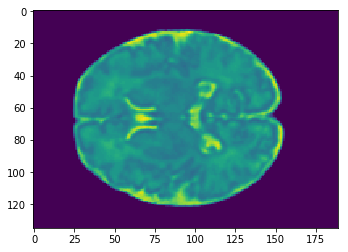

In [4]:
plt.imshow(img[:,:,90])

In [15]:
affine, rotation = create_affine_matrix([0.98,1.02],
                             [-20,20],
                             [-3,3],
                             img.shape)

In [21]:
import numpy as np

In [22]:
target_size = [128, 128, 128]
img_t, transform = similarity_transform_volumes(
    img,
    np.eye(4),
    target_size,
)

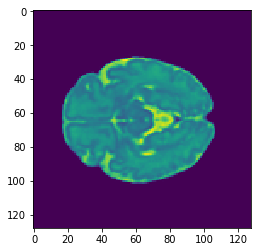

In [23]:
plt.imshow(img_t[:,:,60])

In [18]:
print(rotation)

[ -5.45520904   5.07297137  17.05375312]


In [9]:
rotation_matrix = create_rotation_matrix(rotation)
print(rotation_matrix)

[[ 0.94260615 -0.27526353 -0.18900696]
 [ 0.31783353  0.91316004  0.25518734]
 [ 0.10234983 -0.3006139   0.94823826]]


In [10]:
vector = vrrotmat2vec(rotation_matrix)
print(vector)

[[-0.64368873]
 [-0.33742832]
 [ 0.68688205]
 [ 0.44641138]
 [ 1.        ]]


In [11]:
vec3 = vec5_to_vec3(vector)
print(vec3)

[-0.28734997 -0.15063184  0.30663196]


In [12]:
vec5 = vec3_to_vec5(vec3)
print(vec5)

[[-0.64368873]
 [-0.33742832]
 [ 0.68688205]
 [ 0.44641138]
 [ 1.        ]]


In [14]:
back_rot_matrix = vrrotvec2mat(vec5)
print(back_rot_matrix)

[[ 0.94260615 -0.27526353 -0.18900696]
 [ 0.31783353  0.91316004  0.25518734]
 [ 0.10234983 -0.3006139   0.94823826]]


In [25]:
import click